# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create row to process down the list
row_counter = 1
# Create a dictionary with parameters using api
settings = {"appid": api_key, "units": "imperial"}
# Call the input URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

In [6]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | valparaiso
Processing Record 2 of Set 1 | georgetown
City not found. Skipping...
Processing Record 3 of Set 1 | penzance
Processing Record 4 of Set 1 | atuona
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | nanortalik
City not found. Skipping...
Processing Record 11 of Set 1 | banyo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | mercedes
Processing Record 14 of Set 1 | karpogory
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | maputo
Processing Record 17 of Set 1 | kapaa
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | 

City not found. Skipping...
Processing Record 31 of Set 4 | provideniya
Processing Record 32 of Set 4 | najran
Processing Record 33 of Set 4 | prince rupert
Processing Record 34 of Set 4 | norrtalje
City not found. Skipping...
Processing Record 35 of Set 4 | hilo
Processing Record 36 of Set 4 | antofagasta
Processing Record 37 of Set 4 | laguna
Processing Record 38 of Set 4 | puri
Processing Record 39 of Set 4 | yumen
Processing Record 40 of Set 4 | creston
Processing Record 41 of Set 4 | sur
City not found. Skipping...
Processing Record 42 of Set 4 | lyngseidet
Processing Record 43 of Set 4 | gabu
Processing Record 44 of Set 4 | bulgan
Processing Record 45 of Set 4 | karasjok
City not found. Skipping...
Processing Record 46 of Set 4 | morondava
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | lingao
Processing Record 49 of Set 4 | cardiff
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | sorland
Processin

Processing Record 15 of Set 8 | vaitape
Processing Record 16 of Set 8 | coihaique
Processing Record 17 of Set 8 | cartagena
Processing Record 18 of Set 8 | cabedelo
Processing Record 19 of Set 8 | yankton
Processing Record 20 of Set 8 | sechura
Processing Record 21 of Set 8 | harper
Processing Record 22 of Set 8 | vila velha
Processing Record 23 of Set 8 | camacha
Processing Record 24 of Set 8 | les cayes
Processing Record 25 of Set 8 | san jose
Processing Record 26 of Set 8 | yeovil
Processing Record 27 of Set 8 | pangnirtung
Processing Record 28 of Set 8 | banda aceh
City not found. Skipping...
Processing Record 29 of Set 8 | dhidhdhoo
Processing Record 30 of Set 8 | pailon
Processing Record 31 of Set 8 | kisangani
Processing Record 32 of Set 8 | alice springs
Processing Record 33 of Set 8 | namie
Processing Record 34 of Set 8 | qasigiannguit
City not found. Skipping...
Processing Record 35 of Set 8 | mbuji-mayi
Processing Record 36 of Set 8 | cayenne
Processing Record 37 of Set 8 | 

City not found. Skipping...
Processing Record 49 of Set 11 | saint-pierre
Processing Record 1 of Set 12 | progreso
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)


In [8]:
weather_dataframe.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [58]:
output_data_file = "output_data/cities.csv"
weather_dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,valparaiso,1,US,1567234549,93,41.47,-87.06,63.00,4.32
1,georgetown,0,GY,1567234736,100,6.80,-58.16,75.20,2.24
2,penzance,75,GB,1567234736,93,50.12,-5.53,62.60,19.46
3,atuona,13,PF,1567234737,79,-9.80,-139.03,79.43,18.37
4,bambous virieux,75,MU,1567234614,57,-20.26,57.41,77.00,19.46
5,albany,1,US,1567234643,87,42.65,-73.75,62.01,4.70
6,port alfred,0,CD,1567234597,36,-7.04,29.76,77.99,2.59
7,upernavik,87,GL,1567234739,55,72.79,-56.15,44.69,14.94
8,bethel,90,US,1567234739,87,60.79,-161.76,57.20,6.93
9,nanortalik,1,GL,1567234740,89,60.14,-45.24,41.09,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

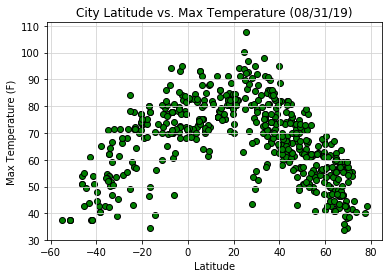

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Max Temperature (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()


#### Latitude vs. Humidity Plot

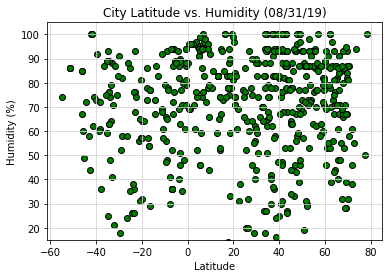

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

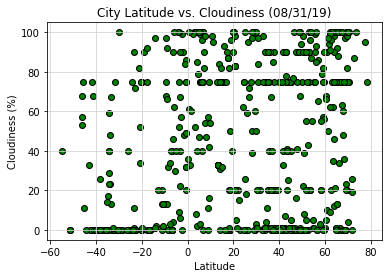

In [30]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

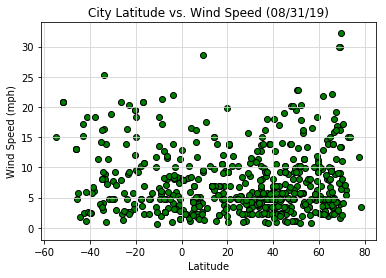

In [31]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed (08/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

In [ ]:
# 3 obesrvable trends that can be seen in the data

#1. There is a trend that can be seen in the city latitude vs max temperature for all randomized cities, we see that the maximum temperature is seen between the latitude of 20 and 40 x value. One can see this because these are cities nearest to the latitude of the equator
#2. In the scatter plot of latitude vs cloudiness, there is no observable trend, all the data points are over the place, there is no observable regression line or slope in which a coefficient value is affecting the outcome. Cloudiness is an affect from the daily weather and not a geographical pinpoint location.
#3. Another observable trend is that the api call was able to locate cities that are small in size and that are not major cities. There are a lot of cities that one may have not heard of and it's interesting to collect data that is remote.
